In [17]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 14
sns.set(style="white", context="talk")

#Updated donor file, new donors 2008 -2015
file = 'GAdata_bydonor2008_pipe.txt'

#error_bad_lines drops any record with extra delimiters
donors = pd.read_csv(file, sep='|', error_bad_lines=False, index_col='iContactID')


Skipping line 199174: expected 128 fields, saw 129

Skipping line 258189: expected 128 fields, saw 129

Skipping line 477846: expected 128 fields, saw 129

Skipping line 487703: expected 128 fields, saw 130

Skipping line 488292: expected 128 fields, saw 129
Skipping line 488638: expected 128 fields, saw 129

Skipping line 508883: expected 128 fields, saw 129

Skipping line 570933: expected 128 fields, saw 129

Skipping line 574103: expected 128 fields, saw 129
Skipping line 574984: expected 128 fields, saw 129

Skipping line 606825: expected 128 fields, saw 129

Skipping line 636228: expected 128 fields, saw 129

Skipping line 687399: expected 128 fields, saw 130

Skipping line 794761: expected 128 fields, saw 129

Skipping line 819196: expected 128 fields, saw 129

Skipping line 849668: expected 128 fields, saw 129

Skipping line 856968: expected 128 fields, saw 129

Skipping line 878954: expected 128 fields, saw 129

Skipping line 902640: expected 128 fields, saw 130
Skipping line 9

### FEATURE ENGINEERING

In [18]:
#create new channel total count & amount variables

donors['all_years_total'] = donors.num_2008_gifts + donors.num_2009_gifts + donors.num_2010_gifts + donors.num_2011_gifts + donors.num_2012_gifts + donors.num_2013_gifts + donors.num_2014_gifts + donors.num_2015_gifts
donors['all_years_dm_total'] = donors.num_dm_2008_gifts + donors.num_dm_2009_gifts + donors.num_dm_2010_gifts + donors.num_dm_2011_gifts + donors.num_dm_2012_gifts + donors.num_dm_2013_gifts + donors.num_dm_2014_gifts + donors.num_dm_2015_gifts
donors['all_years_nm_total'] =  donors.num_nm_2008_gifts + donors.num_nm_2009_gifts + donors.num_nm_2010_gifts + donors.num_nm_2011_gifts + donors.num_nm_2012_gifts + donors.num_nm_2013_gifts + donors.num_nm_2014_gifts + donors.num_nm_2015_gifts
donors['all_years_st_total'] = donors.num_st_2008_gifts + donors.num_st_2009_gifts + donors.num_st_2010_gifts + donors.num_st_2011_gifts + donors.num_st_2012_gifts + donors.num_st_2013_gifts + donors.num_st_2014_gifts + donors.num_st_2015_gifts
donors['all_years_fi_total'] = donors.num_fi_2008_gifts + donors.num_fi_2009_gifts + donors.num_fi_2010_gifts + donors.num_fi_2011_gifts + donors.num_fi_2012_gifts + donors.num_fi_2013_gifts + donors.num_fi_2014_gifts + donors.num_fi_2015_gifts
donors['all_years_sp_total'] = donors.num_sp_2008_gifts + donors.num_sp_2009_gifts + donors.num_sp_2010_gifts + donors.num_sp_2011_gifts + donors.num_sp_2012_gifts + donors.num_sp_2013_gifts + donors.num_sp_2014_gifts + donors.num_sp_2015_gifts


donors['all_years_amt'] = donors.amt_2008_gifts + donors.amt_2009_gifts + donors.amt_2010_gifts + donors.amt_2011_gifts + donors.amt_2012_gifts + donors.amt_2013_gifts + donors.amt_2014_gifts + donors.amt_2015_gifts
donors['all_years_dm_amt'] = donors.amt_dm_2008_gifts + donors.amt_dm_2009_gifts + donors.amt_dm_2010_gifts + donors.amt_dm_2011_gifts + donors.amt_dm_2012_gifts + donors.amt_dm_2013_gifts + donors.amt_dm_2014_gifts + donors.amt_dm_2015_gifts
donors['all_years_nm_amt'] = donors.amt_nm_2008_gifts + donors.amt_nm_2009_gifts + donors.amt_nm_2010_gifts + donors.amt_nm_2011_gifts + donors.amt_nm_2012_gifts + donors.amt_nm_2013_gifts + donors.amt_nm_2014_gifts + donors.amt_nm_2015_gifts
donors['all_years_st_amt'] = donors.amt_st_2008_gifts + donors.amt_st_2009_gifts + donors.amt_st_2010_gifts + donors.amt_st_2011_gifts + donors.amt_st_2012_gifts + donors.amt_st_2013_gifts + donors.amt_st_2014_gifts + donors.amt_st_2015_gifts
donors['all_years_fi_amt'] = donors.amt_fi_2008_gifts + donors.amt_fi_2009_gifts + donors.amt_fi_2010_gifts + donors.amt_fi_2011_gifts + donors.amt_fi_2012_gifts + donors.amt_fi_2013_gifts + donors.amt_fi_2014_gifts + donors.amt_fi_2015_gifts
donors['all_years_sp_amt'] = donors.amt_sp_2008_gifts + donors.amt_sp_2009_gifts + donors.amt_sp_2010_gifts + donors.amt_sp_2011_gifts + donors.amt_sp_2012_gifts + donors.amt_sp_2013_gifts + donors.amt_sp_2014_gifts + donors.amt_sp_2015_gifts

In [19]:
#gift averages by channel - updating original data b/c pull may be incorrect

donors['avg_dm_gift'] = donors.all_years_dm_amt / donors.all_years_dm_total
donors['avg_nm_gift'] = donors.all_years_nm_amt / donors.all_years_nm_total
donors['avg_fi_gift'] = donors.all_years_fi_amt / donors.all_years_fi_total
donors['avg_sp_gift'] = donors.all_years_sp_amt / donors.all_years_sp_total
donors['avg_st_gift'] = donors.all_years_st_amt / donors.all_years_st_total

In [20]:
# prep for flags
donors['has_given'] = donors.all_years_total > 0
donors['dm_only'] = donors.all_years_total==donors.all_years_dm_total
donors['nm_only'] = donors.all_years_total==donors.all_years_nm_total
donors['store_ever'] = donors.all_years_st_total > 0
donors['online_ever'] = donors.all_years_nm_total > 0


#create channel-only donor flags

donors['dm_only_donor'] = donors.has_given & donors.dm_only
donors['nm_only_donor'] = donors.has_given & donors.nm_only
donors['store_ever_donor'] = donors.store_ever & donors.has_given
donors['online_ever_donor'] = donors.online_ever & donors.has_given

# cannot define--forgot to pull TM counts! 
# donors['tm_ever_donor']

In [21]:
#years of active giving
donors['active_2008'] = donors.num_2008_gifts > 0
donors['active_2009'] = donors.num_2009_gifts > 0 
donors['active_2010'] = donors.num_2010_gifts > 0
donors['active_2011'] = donors.num_2011_gifts > 0
donors['active_2012'] = donors.num_2012_gifts > 0
donors['active_2013'] = donors.num_2013_gifts > 0
donors['active_2014'] = donors.num_2014_gifts > 0
donors['active_2015'] = donors.num_2015_gifts > 0

#election year indicators
donors['any_election_year_donor'] = (donors.active_2008) | (donors.active_2010) | (donors.active_2012) | (donors.active_2014)
donors['election_year_total'] = donors.num_2008_gifts + donors.num_2010_gifts + donors.num_2012_gifts + donors.num_2014_gifts

donors['election_year_only_donor'] = donors.election_year_total == donors.all_years_total

In [22]:
donors['num_active_years'] = donors.active_2008.astype(float) + donors.active_2009.astype(float) + donors.active_2010.astype(float) + donors.active_2011.astype(float) + donors.active_2012.astype(float) + donors.active_2013.astype(float) + donors.active_2014.astype(float) + donors.active_2015.astype(float)


In [23]:
from datetime import datetime

#convert First Gift date to 3 values - year, month

donors.dtFC_Date = pd.to_datetime(donors.dtFC_Date, errors='coerce')
donors.dtFC_Date = donors.dtFC_Date.fillna(0)
donors['dtFC_Year'] = donors.dtFC_Date.dt.year.astype(int)
donors['dtFC_Month'] = donors.dtFC_Date.dt.month.astype(int)
donors['dtFC_diff'] = donors.dtFC_Date.map(lambda x: datetime.now() - x)

#create dummies for Month of First Gift
fc_month_dummies = pd.get_dummies(donors.dtFC_Month, prefix='fc_month_')

#convert Recent gifts to year, month
donors.dtMRC_Date = pd.to_datetime(donors.dtMRC_Date, errors='coerce')
donors.dtMRC_Date = donors.dtMRC_Date.fillna(0)
donors['dtMRC_Year']=donors.dtMRC_Date.dt.year.astype(int)
donors['dtMRC_Month'] = donors.dtMRC_Date.dt.month.astype(int)


In [91]:
donors['dtFC_diff'] = donors.dtFC_diff.astype(int)

In [25]:
donors.shape

(2051822, 166)

### DATA CLEANING


In [46]:
#Zip Cleaning

donors['sZip'] = donors.sZip.astype('string').fillna(0)
donors['sZip']=donors.sZip.str.replace('-','')
donors['sZip']=donors.sZip.str.replace(' ','')
donors = donors[donors.sZip != 'not']
donors = donors[donors.sZip != 'V6G 1']
donors = donors[donors.sZip != ' ']


In [47]:
#create regional zip values -- first digit of zipcode
donors['zip_region']=donors.sZip.str[:1]

In [48]:
donors = donors[donors.zip_region.str.contains('[0-9]')]

In [49]:
donors['mHPCFive'] = donors.mHPCFive.fillna(0)
donors['mHPCLT'] = donors.mHPCLT.fillna(0)
donors['all_years_total'] = donors.all_years_total.fillna(0)
donors['all_years_amt'] = donors.all_years_amt.fillna(0) 
#donors['dtMRC_Year'] = donors.dtMRC_Year.fillna(0)
#donors['dtFC_Year'] = donors.dtFC_Year.fillna(0)


In [50]:
#donors[(donors.all_years_total<0) | (donors.all_years_total>490)]
#donors.all_years_total.dtypes

#replace NaN values with 0
donors['all_years_total'] = donors.all_years_total.fillna(0)
donors['avg_gift'] = donors.avg_gift.fillna(0)

In [29]:
#recast fields to appropriate types

#dtMRC_Date to date
donors['dtMRC_Date'] = pd.to_datetime(donors.dtMRC_Date, errors='coerce')

#convert sZip to category
donors['sZip'] = donors.sZip.astype('category')

#convert has_email to bool
donors['has_email'] = donors.has_email.astype('bool')

In [51]:
#drop bad records
donors = donors[donors.all_years_total >= 1]
low_dollar_donors = donors[(donors.avg_gift < 1000) & (donors.avg_gift > 0)]

Out[103]:

Index([u'FC_act_0', u'FC_act_1', u'FC_act_DM', u'FC_act_FI', u'FC_act_NETBO',
       u'FC_act_NETDEM', u'FC_act_NM', u'FC_act_OP', u'FC_act_OT',
       u'FC_act_SP', u'FC_act_ST'],
      dtype='object')

In [105]:
# a little more data cleaning -- fixing data types
donors['zip_region'] = donors.zip_region.astype(str)

#convert first gift account to dummies
account_dummies = pd.get_dummies(donors.sFC_Account, prefix = 'FC_act')


TypeError: unsupported operand type(s) for |: 'float' and 'bool'

## Visualizations

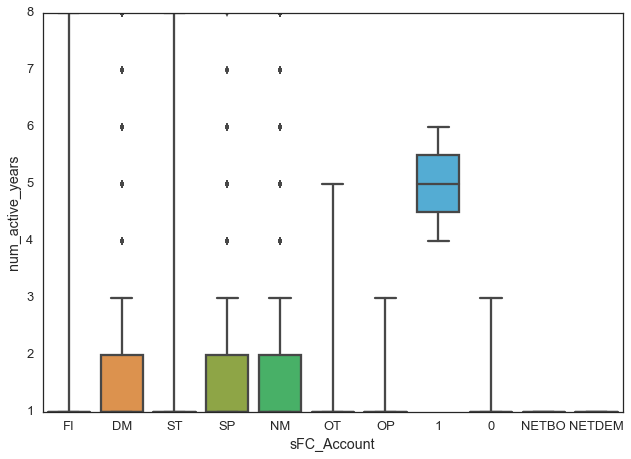

In [52]:
#graphing time!
sns.boxplot(data=donors, x='sFC_Account', y='num_active_years')

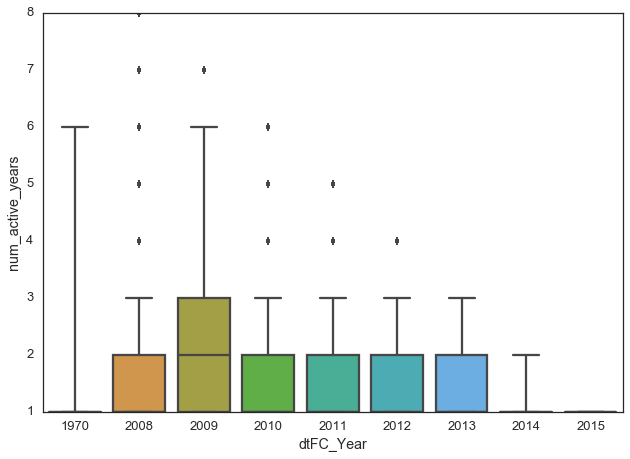

In [53]:
sns.boxplot(data=donors, x='dtFC_Year', y='num_active_years')

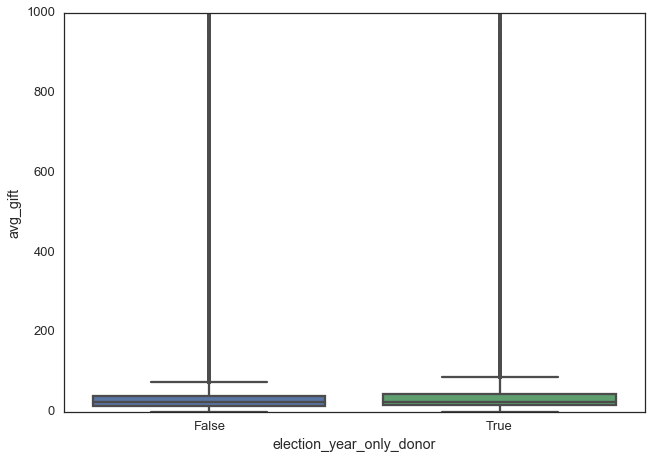

In [54]:
sns.boxplot(data=low_dollar_donors, x='election_year_only_donor', y='avg_gift')

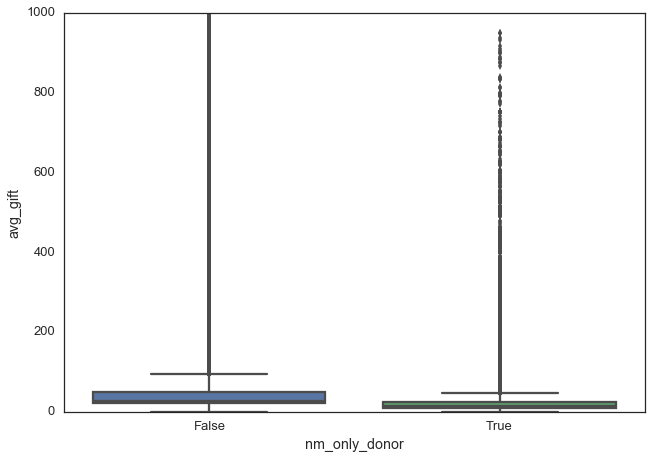

In [55]:
sns.boxplot(data=low_dollar_donors, x='nm_only_donor', y='avg_gift')

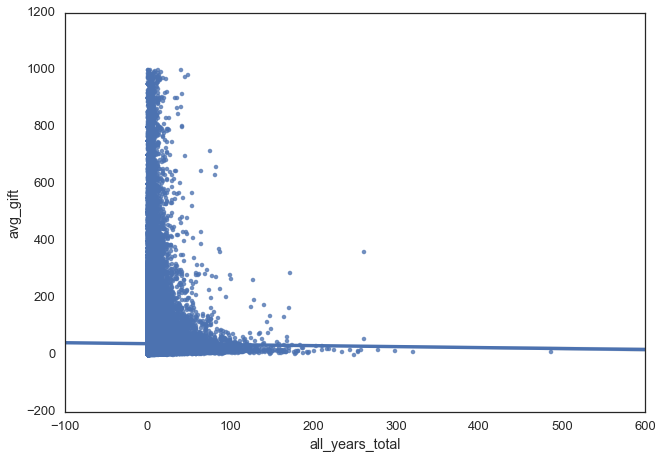

In [57]:
#re-plot
sns.regplot('all_years_total', 'avg_gift', low_dollar_donors)

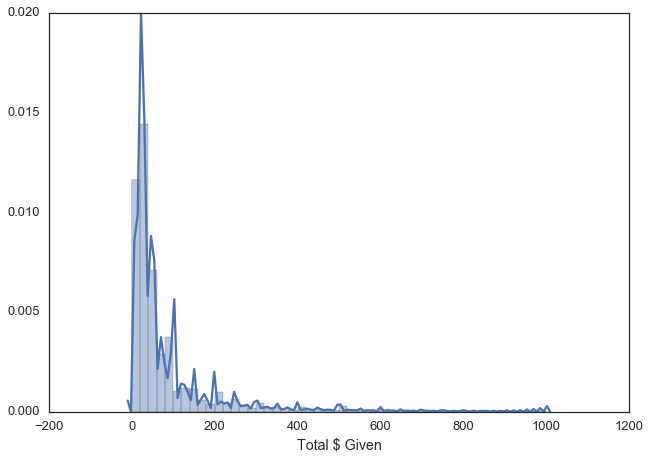

In [131]:
x = low_dollar_donors[low_dollar_donors.all_years_amt < 1000]

sns.distplot(x.all_years_amt, axlabel = 'Total $ Given')


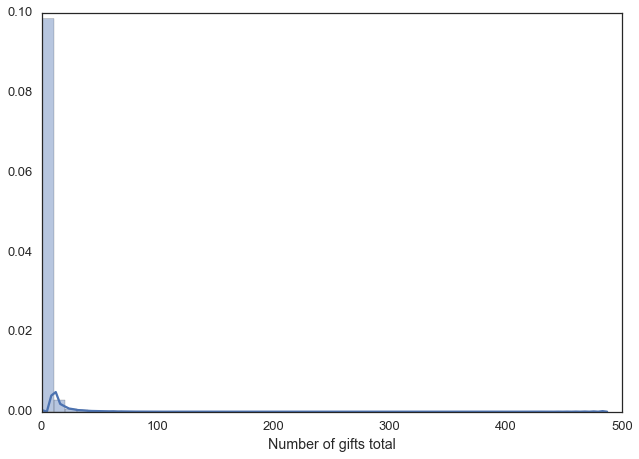

In [59]:
sns.distplot(x.all_years_total, axlabel = 'Number of gifts total')

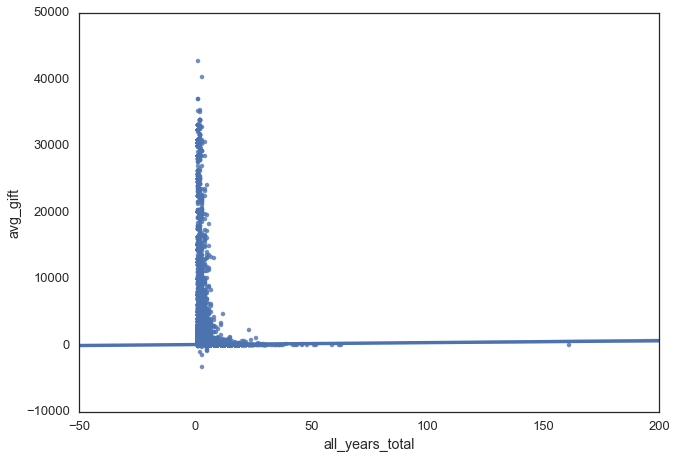

In [60]:
election_donors = donors[donors.election_year_only_donor == True]
sns.regplot('all_years_total', 'avg_gift', election_donors)

In [63]:
features_one = ['zip_region','mHPCFive', 'mHPCLT', 'all_years_total', 'all_years_amt', 'dtFC_Year', 'dtMRC_Year', 'has_email', 'online_ever', 'store_ever']
donors[features_one].dtypes

zip_region          object
mHPCFive           float64
mHPCLT             float64
all_years_total    float64
all_years_amt      float64
dtFC_Year            int64
dtMRC_Year           int64
has_email             bool
online_ever           bool
store_ever            bool
dtype: object

In [65]:
#pleaseworkpleaseworkpleasework
from sklearn import metrics
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

features_one = ['zip_region','mHPCFive', 'mHPCLT', 'all_years_total', 'all_years_amt', 'dtFC_Year', 'dtMRC_Year', 'has_email', 'online_ever', 'store_ever']
X = donors[features_one]
y = donors.num_active_years


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=555)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
predict = linreg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, predict))
#THIS WORKED FINALLY

0.488186575535


In [66]:
#calculate null RMSE

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
np.sqrt(metrics.mean_squared_error(y_test, y_null))

1.1485326898059518

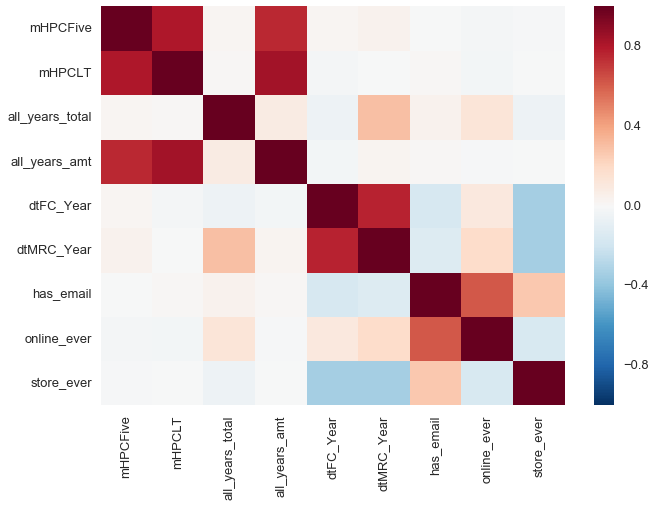

In [67]:
sns.heatmap(donors[features_one].corr())

In [68]:
features_hpc5 = ['zip_region','mHPCFive', 'all_years_total', 'all_years_amt', 'dtFC_Year', 'dtMRC_Year', 'has_email', 'online_ever', 'store_ever']
features_lt = ['zip_region', 'mHPCLT', 'all_years_total', 'all_years_amt', 'dtFC_Year', 'dtMRC_Year', 'has_email', 'online_ever', 'store_ever']

X = donors[features_hpc5]
y = donors.num_active_years


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=555)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
predict = linreg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, predict))


0.48845015683


In [69]:
X = donors[features_lt]
y = donors.num_active_years


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=555)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
predict = linreg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, predict))
#no real difference between HPCLT only, 5 only, and combined. 5 only slightly better.

0.488186533612


In [70]:
features_two = ['active_2008', 'active_2009', 'active_2010', 'active_2011', 'active_2012', 'active_2013', 'active_2014', 'active_2015', 'num_2008_gifts', 'num_2009_gifts', 'num_2010_gifts', 'num_2011_gifts', 'num_2012_gifts', 'num_2013_gifts', 'num_2014_gifts', 'num_2015_gifts','zip_region','mHPCFive', 'all_years_total', 'all_years_amt', 'dtFC_Year', 'dtMRC_Year', 'has_email', 'online_ever', 'store_ever']

In [71]:
X = donors[features_two]
y = donors.num_active_years


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=555)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
predict = linreg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, predict))

5.53674913918e-12


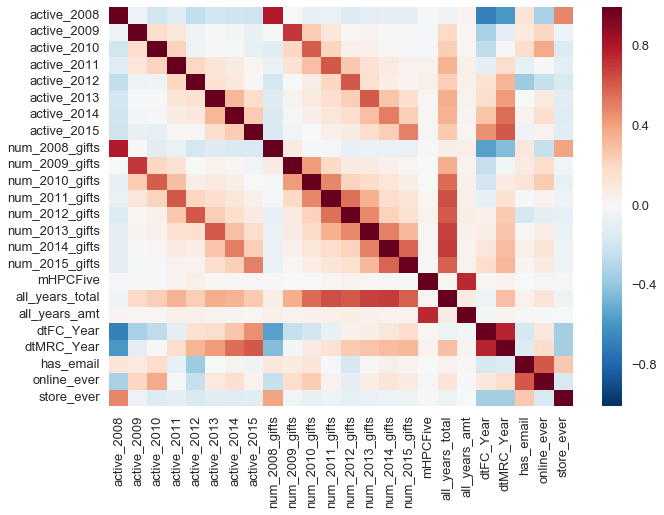

In [72]:
sns.heatmap(X.corr())

## The correlation heatmap suggests that a lot of the key variables are highly correlated. Can then guess that the regression (which is currently outperforming the null) may be overfitting. 

## Next step: Evaluate LinReg along with several other model types, using cross validation, to find the best performing model

In [99]:
# concatenate dummies to main df
donors = pd.concat([donors, fc_month_dummies], axis=1)
donors = pd.concat([donors, account_dummies], axis =1)

In [110]:
account_dummies.dtypes

FC_act_0         float64
FC_act_1         float64
FC_act_DM        float64
FC_act_FI        float64
FC_act_NETBO     float64
FC_act_NETDEM    float64
FC_act_NM        float64
FC_act_OP        float64
FC_act_OT        float64
FC_act_SP        float64
FC_act_ST        float64
dtype: object

In [112]:
#set up features
cv_features = ['mHPCFive', 'all_years_total', 'all_years_amt', 'online_ever', 'nm_only', 'dm_only','has_email', 'election_year_only_donor', 'zip_region', 'dtFC_Year', 'dtMRC_Year', 'dtFC_diff', 'fc_month_1', 'fc_month_2', 'fc_month_3', 'fc_month_4', 'fc_month_5', 'fc_month_6', 'fc_month_7', 'fc_month_8', 'fc_month_9', 'fc_month_10', 'fc_month_11', 'FC_act_DM', 'FC_act_NM', 'FC_act_FI', 'FC_act_SP', 'FC_act_ST'  ]
X = donors[cv_features]
y = donors.num_active_years

In [113]:
donors[cv_features].dtypes

mHPCFive                    float64
all_years_total             float64
all_years_amt               float64
online_ever                    bool
nm_only                        bool
dm_only                        bool
has_email                      bool
election_year_only_donor       bool
zip_region                   object
dtFC_Year                     int64
dtMRC_Year                    int64
dtFC_diff                     int64
fc_month_1                  float64
fc_month_1                  float64
fc_month_2                  float64
fc_month_2                  float64
fc_month_3                  float64
fc_month_3                  float64
fc_month_4                  float64
fc_month_4                  float64
fc_month_5                  float64
fc_month_5                  float64
fc_month_6                  float64
fc_month_6                  float64
fc_month_7                  float64
fc_month_7                  float64
fc_month_8                  float64
fc_month_8                  

In [114]:
#scale dollar-value features to compensate for hi$ donors 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [116]:
from sklearn.cross_validation import cross_val_score
#Run 10-fold Cross Val on regression model

linreg = LinearRegression()
scores = cross_val_score(linreg, X_scaled, y, cv=10, scoring='mean_squared_error')
print np.sqrt(-scores).mean()

0.452854407497


In [128]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(scoring = 'mean_square_error', cv = 10)
ridge.fit(X_scaled, y)
ridge_scores = cross_val_score(linreg, X_scaled, y, cv=10, scoring='mean_squared_error')
print np.sqrt(-ridge_scores).mean()
print ridge.alpha_ #model finds the best alpha value on its own

0.452854406152
1.0


In [124]:
from sklearn.linear_model import BayesianRidge

clf = BayesianRidge()
scores = cross_val_score(clf, X_scaled, y, cv=10, scoring='mean_squared_error')
print np.sqrt(-scores).mean()

0.45284199703


In [126]:
from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(max_depth=4, random_state=1)
treescore = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
rmse = np.mean(np.sqrt(-treescore))
print rmse

0.522537554841


In [127]:
max_depth_range = range(1,30)

RMSE_scores = []

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    treescore = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
    rmse = np.mean(np.sqrt(-treescore))
    RMSE_scores.append(rmse)
print RMSE_scores

[0.7534005438794249, 0.63916732031336765, 0.5600541378152718, 0.52253755484130537, 0.44507030666635483, 0.39977712617254607, 0.36436437682098027, 0.31897394749580338, 0.29489904804348471, 0.2657507466716863, 0.24602303310444901, 0.24221822936125359, 0.23520504100195061, 0.23594292383441884, 0.23826582061051377, 0.24294143703340873, 0.24906174366052763, 0.25592036494942888, 0.26357884605803278, 0.27149115761327874, 0.27860362003642164, 0.28700831525564768, 0.29361321593902351, 0.29928424646855839, 0.30356681396275464, 0.30814814955715863, 0.31172824606970129, 0.31429804560255781, 0.31599564433876415]


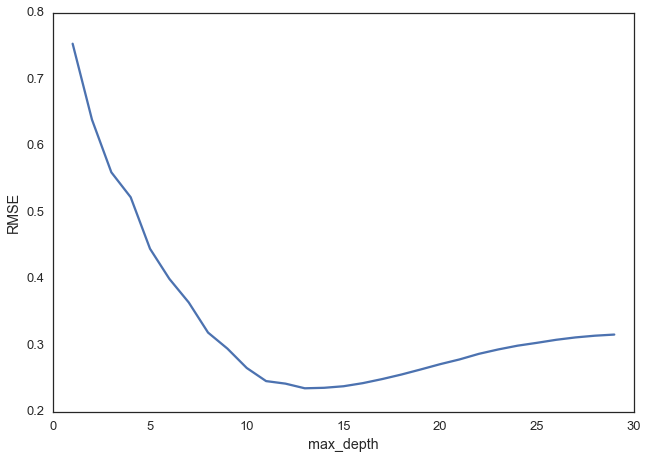

In [133]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.pyplot.plot(max_depth_range, RMSE_scores)
plt.pyplot.xlabel('max_depth')
plt.pyplot.ylabel('RMSE')

In [134]:
#use optimal depth from graph above
treereg = DecisionTreeRegressor(max_depth=13, random_state=1)
treescore = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
rmse = np.mean(np.sqrt(-treescore))
print rmse

0.235205041002
